In [24]:
import matplotlib.pyplot # plotting
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier

In [14]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [47]:
import numpy as np

In [55]:
import pandas as pd
print('Pandas: {}'.format(pd.__version__))

Pandas: 2.2.2


In [28]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.8.4


In [312]:
train_images, train_labels = loadlocal_mnist(images_path='C:/Users/User/Downloads/archive (1)/emnist_source_files/emnist-mnist-train-images-idx3-ubyte'
,labels_path='C:/Users/User/Downloads/archive (1)/emnist_source_files/emnist-mnist-train-labels-idx1-ubyte')

In [318]:
print(train_images.shape)
print(train_labels.shape)

(60000, 784)
(60000,)


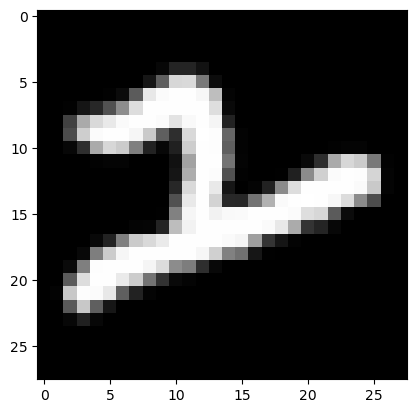

In [320]:
plt.imshow(train_images[0].reshape(28,28), cmap='gray')

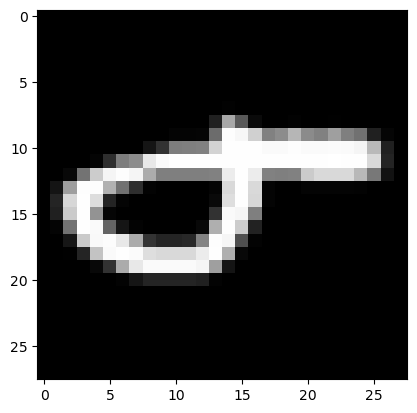

In [322]:

plt.imshow(x1[1].reshape([28,28]), cmap = 'gray')

In [122]:
y1[7]

22

In [326]:
feature, hog_img = hog(train_images[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [328]:
feature.shape

(144,)

<BarContainer object of 144 artists>

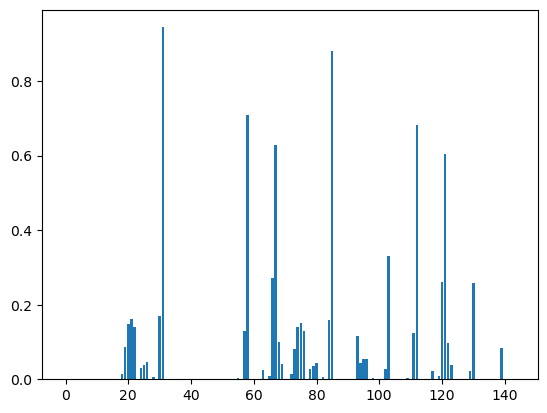

In [330]:
plt.bar(list(range(feature.shape[0])), feature)

In [334]:
feature, hog_img = hog(train_images[0].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

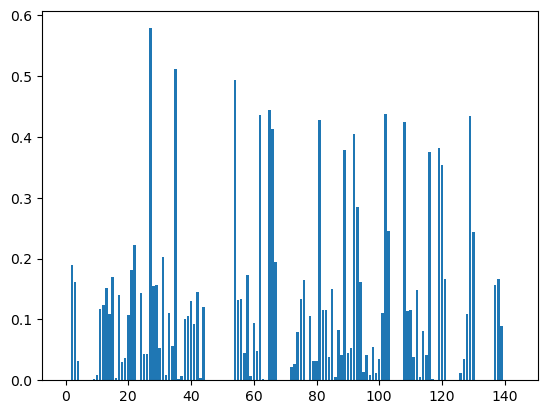

In [336]:
plt.bar(list(range(feature.shape[0])), feature)

In [338]:
n_dims = feature.shape[0]

In [340]:
n_dims

144

In [344]:
n_samples = train_images.shape[0]

In [346]:
n_samples

60000

In [216]:
x_train, y_train = datasets.make_classification(n_samples, n_features=n_dims)

In [160]:
x_train.shape

(88799, 144)

In [348]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [350]:
X_train.shape

(60000, 144)

In [352]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

In [354]:
from sklearn.preprocessing import LabelBinarizer

In [356]:
lb = LabelBinarizer()

In [358]:
lb.fit(y_train)

LabelBinarizer()

In [360]:
LabelBinarizer()

LabelBinarizer()

In [362]:
y_train_one_hot = lb.transform(y_train)

In [364]:
y_train_one_hot[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [366]:
y_train[0]

4

In [368]:
import numpy as np

In [370]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [372]:
label[0]

4

In [378]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=5000)

In [380]:
clf.fit(X_train, y_train_one_hot)

MLPClassifier(hidden_layer_sizes=(128, 64, 10), max_iter=5000, solver='sgd')

In [384]:
test_images, test_labels = loadlocal_mnist(images_path='C:/Users/User/Downloads/archive (1)/emnist_source_files/emnist-mnist-test-images-idx3-ubyte',
                                             labels_path='C:/Users/User/Downloads/archive (1)/emnist_source_files/emnist-mnist-test-labels-idx1-ubyte')

In [386]:
n_samples = test_images.shape[0]

In [388]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [390]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [392]:
y_test_one_hot = lb.transform(y_test)

In [394]:
y_pred_one_hot = clf.predict(X_test)

In [396]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [398]:
y_pred

array([1, 8, 6, ..., 8, 9, 6])

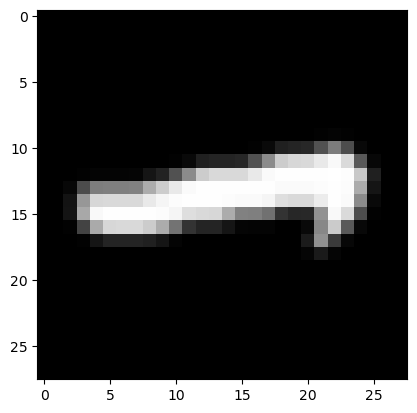

In [402]:
plt.imshow(test_images[0].reshape(28,28), cmap='gray')

In [404]:
out_one_hot = clf.predict(X_test[20].reshape(1, n_dims))

In [408]:
out_one_hot

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [410]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [412]:
out[0]

0

In [414]:
from sklearn.metrics import confusion_matrix

In [416]:
conf_mat = confusion_matrix(y_test, y_pred)

In [418]:
conf_mat

array([[996,   0,   0,   1,   1,   0,   1,   0,   1,   0],
       [ 15, 977,   3,   0,   4,   0,   0,   0,   1,   0],
       [ 14,   1, 975,   4,   1,   0,   0,   0,   5,   0],
       [ 12,   0,  10, 967,   0,   5,   0,   0,   4,   2],
       [  7,   2,   0,   0, 989,   0,   0,   0,   0,   2],
       [ 10,   0,   1,   7,   2, 976,   2,   0,   1,   1],
       [  5,   0,   0,   0,   4,   1, 990,   0,   0,   0],
       [  5,   2,   7,   2,   4,   0,   0, 977,   2,   1],
       [ 20,   6,   4,  10,   2,   7,   5,   1, 943,   2],
       [ 22,   0,   0,   3,   6,   0,   0,   4,   5, 960]], dtype=int64)

In [420]:
from mlxtend.plotting import plot_confusion_matrix

In [422]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

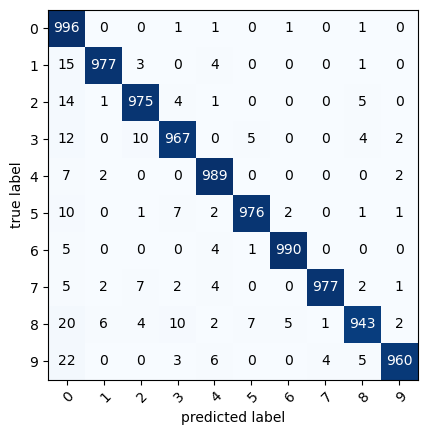

In [424]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

In [426]:
from sklearn.metrics import precision_score

In [428]:
precision = precision_score(y_test, y_pred, average=None)

In [430]:
precision

array([0.9005425 , 0.9888664 , 0.975     , 0.97283702, 0.976308  ,
       0.98685541, 0.99198397, 0.99490835, 0.98024948, 0.99173554])

In [432]:
from sklearn.metrics import recall_score

In [434]:
recall = recall_score(y_test, y_pred, average=None)

In [436]:
recall

array([0.996, 0.977, 0.975, 0.967, 0.989, 0.976, 0.99 , 0.977, 0.943,
       0.96 ])

In [438]:
from sklearn.metrics import accuracy_score

In [440]:
accuracy = accuracy_score(y_test, y_pred)

In [442]:
accuracy

0.975

In [444]:
from sklearn.metrics import f1_score

In [446]:
f1 = f1_score(y_test, y_pred, average='macro')

In [448]:
f1

0.9751424381142038